In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [5]:
%matplotlib inline

In [6]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [7]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [8]:
title = "RH"

In [9]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/"

## Baseline

In [10]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/baseline

Average verified rate: 0.9387787145442784

Average of error rates: 0.06615758854731078

Total token count: 53677197



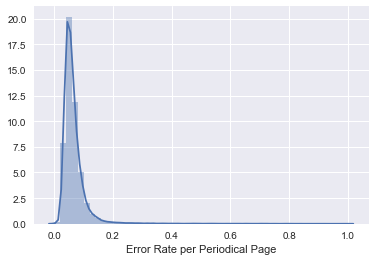

In [11]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [12]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 1000 )

[('-', 137800),
 ('ñ', 132460),
 ('w', 54610),
 ('e', 50924),
 ('m', 47445),
 ("'", 47033),
 (')', 37755),
 ('d', 36307),
 ('con-', 34731),
 ('re-', 34099),
 ('t', 31093),
 ('tion', 29338),
 ('r', 29058),
 ('g', 27133),
 ('¥', 26990),
 ('n', 25644),
 ('in-', 24804),
 ('f', 24740),
 ('be-', 20170),
 ('pm', 17848),
 ('(', 16843),
 ('de-', 16555),
 ('com-', 16064),
 ('ment', 13752),
 ('ex-', 13416),
 ('tions', 8992),
 ('ence', 8986),
 ('en-', 8968),
 ('dis-', 8820),
 ('ad-', 8051),
 ('--', 7781),
 ('un-', 7647),
 ('pro-', 7542),
 ('mis-', 7415),
 ('per-', 7293),
 ('ac-', 7280),
 ('pre-', 6982),
 ('th', 6748),
 ('ference', 6432),
 ('co', 6415),
 ('im-', 6398),
 ('ers', 6385),
 ('ple', 6236),
 ('peo-', 5804),
 ('an-', 5760),
 ('ap-', 5691),
 ('meet-', 5437),
 ('sab-', 5345),
 ('confer-', 5290),
 ('at-', 5249),
 ('k', 5183),
 ('*', 5019),
 ('/', 4870),
 ('ments', 4834),
 ('u', 4754),
 ('for-', 4702),
 (']', 4654),
 ('ñthe', 4577),
 ('al-', 4403),
 ('mes-', 4387),
 ('chris-', 4223),
 ('ful', 

## Review Special Character Use

In [13]:
GoH.reports.tokens_with_special_characters(errors_summary)

[('ñ', 132460),
 (')', 37755),
 ('¥', 26990),
 ('(', 16843),
 ('*', 5019),
 ('/', 4870),
 (']', 4654),
 ('ñthe', 4577),
 ('_', 3142),
 ('ã', 2158),
 ('-*-', 2100),
 ('[vol', 2073),
 ('(see', 1853),
 ('%', 1670),
 ('ña', 1605),
 ('=', 1439),
 ('¥the', 1422),
 ('[', 1419),
 ('¡', 1262),
 ('[the', 1247),
 ('(the', 1178),
 ('¥¥', 1178),
 ('+', 1123),
 ('`', 1121),
 ('__', 1026),
 ('—', 1001),
 ('[entered', 982),
 ('(local)', 851),
 ('(to', 838),
 ('£', 826),
 ('(battle', 820),
 ('ô', 819),
 ('(not', 789),
 ('ñno', 729),
 ('(concluded', 723),
 ('\\', 688),
 ('ñit', 675),
 ('•', 660),
 ('___', 636),
 ('(a', 614),
 ('(a)', 613),
 ('ñps', 571),
 ('(rev', 570),
 ('¥of', 567),
 ('(b)', 550),
 ('(or', 531),
 ('(john', 514),
 ('(continued', 514),
 ('(concluded)', 498),
 ('ñin', 491),
 ('¥to', 466),
 ('(and', 459),
 ('ñwe', 455),
 ('*night', 448),
 ('(rom', 446),
 ('(matt', 445),
 ('<', 439),
 ('the¥', 428),
 ('¥and', 409),
 ('ñid', 408),
 ('¥¥¥', 404),
 ('(i', 401),
 ('(state)', 400),
 ('(i)', 397

## Correction 1 -- Normalize Characters

In [14]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction1

Average verified rate: 0.9461722785030221

Average of error rates: 0.057882279130781956

Total token count: 53446587



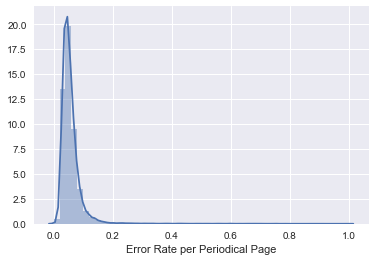

In [15]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [16]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 147529),
 ('w', 54947),
 ('e', 52037),
 ("'", 49025),
 ('m', 47937),
 ('d', 37205),
 ('con-', 34828),
 ('re-', 34154),
 ('t', 32211),
 ('r', 29809),
 ('tion', 29599),
 ('g', 27460),
 ('n', 27234),
 ('f', 25313),
 ('in-', 24855),
 ('be-', 20210),
 ('pm', 17889),
 ('de-', 16583),
 ('com-', 16091),
 ('ment', 13782),
 ('ex-', 13438),
 ('ence', 9018),
 ('tions', 9016),
 ('en-', 8978),
 ('dis-', 8830),
 ('--', 8775),
 ('ad-', 8060),
 ('un-', 7672),
 ('pro-', 7561),
 ('mis-', 7432),
 ('per-', 7304),
 ('ac-', 7286),
 ('pre-', 6987),
 ('th', 6917),
 ('co', 6502),
 ('ference', 6443),
 ('im-', 6408),
 ('ers', 6407),
 ('ple', 6254),
 ('peo-', 5807),
 ('an-', 5780),
 ('ap-', 5705),
 ('meet-', 5439),
 ('sab-', 5356),
 ('k', 5320),
 ('confer-', 5297),
 ('at-', 5255),
 ('u', 4904),
 ('ments', 4848),
 ('for-', 4722)]

## Correction 2 -- Correct Line Endings

In [17]:
# %load shared_elements/correct_line_endings.py
prev = "correction1"
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction2

Average verified rate: 0.972472947325256

Average of error rates: 0.03166380539553985

Total token count: 52464498



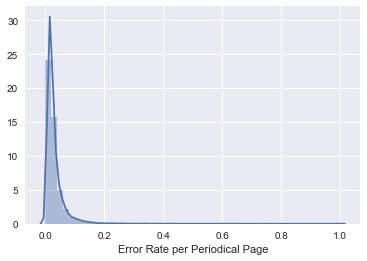

In [18]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [19]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 146749),
 ('w', 54932),
 ('e', 51741),
 ("'", 49025),
 ('m', 47873),
 ('d', 37097),
 ('t', 31847),
 ('r', 29703),
 ('g', 27289),
 ('n', 27093),
 ('f', 25198),
 ('pm', 17878),
 ('--', 8775),
 ('th', 6900),
 ('co', 6495),
 ('k', 5306),
 ('u', 4873),
 ('x', 4046),
 ('oo', 3787),
 ('ex', 3407),
 ("'the", 3372),
 ('-the', 3326),
 ('pa', 2982),
 ('wm', 2709),
 ('mo', 2698),
 ('z', 2421),
 ('io', 2358),
 ('id', 2289),
 ('pp', 2256),
 ('mc', 2162),
 ("the'", 1975),
 ('seventhday', 1968),
 ('tion', 1912),
 ("'of", 1780),
 ('mt', 1738),
 ('ahd', 1679),
 ('re-', 1676),
 ('re', 1625),
 ('---', 1585),
 ('va', 1548),
 ('al', 1427),
 ('-a', 1310),
 ('-died', 1297),
 ("'to", 1291),
 ("'be", 1217),
 ('ft', 1187),
 ('ga', 1180),
 ('nd', 1158),
 ("canvassers'", 1156),
 ('first-day', 1146)]

## Correction  3 -- Remove Extra Dashes

In [21]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction2"
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction3

Average verified rate: 0.9778837666964116

Average of error rates: 0.02588213654251982

Total token count: 52502973



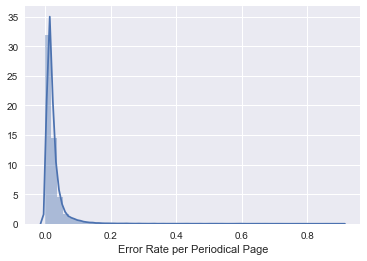

In [22]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [23]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 55116),
 ('e', 52328),
 ("'", 50167),
 ('m', 48056),
 ('d', 37263),
 ('t', 32642),
 ('r', 30301),
 ('g', 27462),
 ('n', 27354),
 ('f', 25445),
 ('pm', 17898),
 ('co', 8855),
 ('th', 7021),
 ('k', 5395),
 ('u', 4930),
 ('re', 4428),
 ('ex', 4236),
 ('x', 4197),
 ('oo', 3819),
 ("'the", 3383),
 ('pa', 3072),
 ('mo', 2739),
 ('wm', 2717),
 ('z', 2508),
 ('mc', 2501),
 ('io', 2447),
 ('id', 2368),
 ('pp', 2262),
 ("the'", 1985),
 ('seventhday', 1971),
 ('tion', 1920),
 ("'of", 1789),
 ('mt', 1752),
 ('ahd', 1680),
 ('al', 1600),
 ('va', 1563),
 ('-', 1498),
 ("'to", 1299),
 ('ti', 1227),
 ("'be", 1219),
 ('ft', 1216),
 ('nd', 1206),
 ('ga', 1184),
 ("canvassers'", 1163),
 ("'i", 1137),
 ("'and", 1133),
 ('ky', 1128),
 ('li', 1115),
 ("'a", 1099),
 ("''", 1092)]

## Correction 4 -- Remove extra quotation marks

In [24]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction4

Average verified rate: 0.9790667555890971

Average of error rates: 0.0246023783722124

Total token count: 52504188



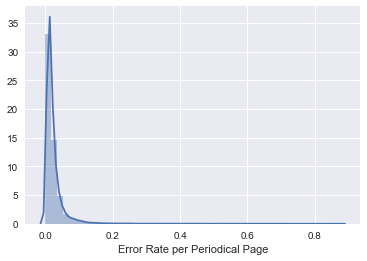

In [25]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [26]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 55205),
 ('e', 52568),
 ('m', 48328),
 ("'", 45823),
 ('d', 37645),
 ('t', 34176),
 ('r', 30481),
 ('n', 27948),
 ('g', 27514),
 ('f', 25574),
 ('pm', 17908),
 ('co', 8869),
 ('th', 7056),
 ('k', 5415),
 ('u', 4948),
 ('re', 4602),
 ('ex', 4247),
 ('x', 4214),
 ('oo', 3826),
 ('pa', 3082),
 ('mo', 2743),
 ('wm', 2726),
 ('z', 2525),
 ('mc', 2504),
 ('io', 2452),
 ('id', 2388),
 ('pp', 2263),
 ('seventhday', 1973),
 ('tion', 1923),
 ("the'", 1923),
 ('mt', 1758),
 ('ahd', 1680),
 ('al', 1629),
 ('va', 1567),
 ('-', 1500),
 ('nd', 1303),
 ('ti', 1250),
 ('ft', 1227),
 ('ga', 1189),
 ("canvassers'", 1131),
 ('ky', 1130),
 ('li', 1129),
 ('q', 1081),
 ('ro', 1032),
 ('mal', 1005),
 ('ment', 1002),
 ('il', 987),
 ('sabbathschool', 926),
 ("''", 913),
 ('sabba', 894)]

## Correction 5 -- Rejoin Burst Words

In [27]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction5

Average verified rate: 0.9790644102898062

Average of error rates: 0.024605344208064796

Total token count: 52504468



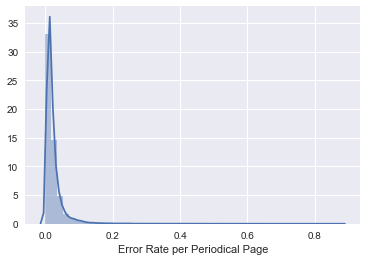

In [28]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [29]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 55193),
 ('e', 52502),
 ('m', 48329),
 ("'", 45826),
 ('d', 37653),
 ('t', 34137),
 ('r', 30443),
 ('n', 27923),
 ('g', 27507),
 ('f', 25566),
 ('pm', 17908),
 ('co', 8867),
 ('th', 7055),
 ('k', 5411),
 ('u', 4938),
 ('re', 4618),
 ('ex', 4247),
 ('x', 4213),
 ('oo', 3826),
 ('pa', 3082),
 ('mo', 2743),
 ('wm', 2726),
 ('z', 2525),
 ('mc', 2505),
 ('io', 2453),
 ('id', 2388),
 ('pp', 2263),
 ('seventhday', 1973),
 ('tion', 1923),
 ("the'", 1923),
 ('mt', 1758),
 ('ahd', 1680),
 ('al', 1627),
 ('va', 1567),
 ('-', 1500),
 ('nd', 1303),
 ('ti', 1249),
 ('ft', 1227),
 ('ga', 1189),
 ("canvassers'", 1131),
 ('ky', 1130),
 ('li', 1130),
 ('q', 1081),
 ('ro', 1031),
 ('mal', 1005),
 ('ment', 1002),
 ('il', 986),
 ('sabbathschool', 926),
 ("''", 913),
 ('sabba', 894)]

## Correction 6 -- Rejoin Split Words

In [30]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction6

Average verified rate: 0.9793888505911469

Average of error rates: 0.024266668567843496

Total token count: 52490765



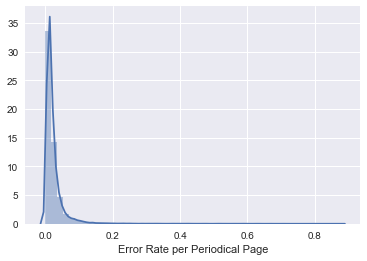

In [31]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [32]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 55171),
 ('e', 52111),
 ('m', 48561),
 ("'", 45826),
 ('d', 37570),
 ('t', 33920),
 ('r', 30344),
 ('n', 27801),
 ('g', 27472),
 ('f', 25542),
 ('pm', 17908),
 ('co', 6756),
 ('th', 6033),
 ('k', 5375),
 ('u', 4915),
 ('x', 4204),
 ('ex', 4129),
 ('oo', 3778),
 ('pa', 3046),
 ('wm', 2726),
 ('mo', 2657),
 ('z', 2522),
 ('re', 2502),
 ('io', 2452),
 ('id', 2359),
 ('pp', 2260),
 ('seventhday', 1973),
 ("the'", 1923),
 ('tion', 1767),
 ('mt', 1751),
 ('ahd', 1680),
 ('va', 1553),
 ('-', 1500),
 ('al', 1443),
 ('nd', 1293),
 ('ft', 1222),
 ('ga', 1183),
 ("canvassers'", 1131),
 ('ky', 1130),
 ('ti', 1092),
 ('q', 1081),
 ('li', 1011),
 ('mal', 1001),
 ('ro', 994),
 ('ment', 973),
 ('il', 949),
 ('sabbathschool', 926),
 ('mc', 915),
 ("''", 913),
 ('vt', 878)]

## Correction 7 -- Rejoin Split Words II

In [33]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction7

Average verified rate: 0.979517762639131

Average of error rates: 0.024111161809159874

Total token count: 52480546



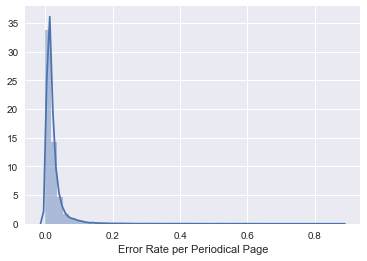

In [34]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [35]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 55018),
 ('e', 52036),
 ('m', 48413),
 ("'", 45820),
 ('d', 37504),
 ('t', 33748),
 ('r', 30226),
 ('n', 27752),
 ('g', 27415),
 ('f', 25466),
 ('pm', 17890),
 ('co', 6668),
 ('th', 5847),
 ('k', 5367),
 ('u', 4907),
 ('x', 4204),
 ('ex', 4124),
 ('oo', 3650),
 ('pa', 3045),
 ('wm', 2726),
 ('mo', 2650),
 ('z', 2505),
 ('io', 2447),
 ('id', 2307),
 ('pp', 2257),
 ('seventhday', 1973),
 ('re', 1927),
 ("the'", 1923),
 ('mt', 1750),
 ('tion', 1741),
 ('ahd', 1680),
 ('va', 1546),
 ('-', 1500),
 ('al', 1366),
 ('ft', 1205),
 ('ga', 1181),
 ('nd', 1153),
 ("canvassers'", 1131),
 ('ky', 1130),
 ('q', 1079),
 ('ti', 1056),
 ('mal', 995),
 ('ro', 981),
 ('li', 975),
 ('sabbathschool', 926),
 ('il', 924),
 ("''", 913),
 ('vt', 878),
 ('eze', 863),
 ('mc', 852)]

## Review Remaining Errors

In [36]:
GoH.reports.docs_with_high_error_rate(summary)

[('RH19091021-V86-42-page1.txt', 0.875),
 ('RH19050601-V82-22-page1.txt', 0.857),
 ('RH19061101-V83-44-page1.txt', 0.8),
 ('RH19140402-V91-14-page1.txt', 0.795),
 ('RH19140924-V91-40-page1.txt', 0.708),
 ('RH19060510-V83-19-page1.txt', 0.706),
 ('RH19140528-V91-22-page1.txt', 0.692),
 ('RH19140212-V91-07-page1.txt', 0.674),
 ('RH19050209-V82-06-page1.txt', 0.667),
 ('RH19140205-V91-06-page1.txt', 0.667),
 ('RH19160727-V93-37-page1.txt', 0.64),
 ('RH19140827-V91-36-page1.txt', 0.632),
 ('RH19160127-V93-05-page1.txt', 0.63),
 ('RH19140305-V91-10-page1.txt', 0.628),
 ('RH19031210-V80-49-page1.txt', 0.619),
 ('RH19160622-V93-31-page1.txt', 0.612),
 ('RH19110330-V88-13-page1.txt', 0.6),
 ('RH19021118-V79-46-page1.txt', 0.6),
 ('RH19080305-V85-10-page1.txt', 0.594),
 ('RH19140226-V91-09-page1.txt', 0.593),
 ('RH19021014-V79-41-page1.txt', 0.591),
 ('RH19140108-V91-02-page1.txt', 0.586),
 ('RH19131218-V90-51-page1.txt', 0.585),
 ('RH19131113-V90-46-page1.txt', 0.583),
 ('RH19190807-V96-32-pag

In [37]:
check_docs = ['RH19120815-V89-33-page24.txt', 'RH19130626-V90-26-page15.txt', 'RH19131113-V90-46-page25.txt', 
             'RH19131113-V90-46-page25.txt', 'RH19160727-V93-37-page19.txt', 'RH19151028-V92-53-page12.txt',
              'RH19110824-V88-34-page19.txt', 'RH19110824-V88-34-page21.txt','RH19110824-V88-34-page23.txt',
              'RH19130626-V90-26-page11.txt'
             ]

In [38]:
# %load shared_elements/high_error_rates.py
# doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.2]

GoH.utilities.open_original_docs(check_docs, directories['cycle'])

Opened files: 

RH19120815-V89-33-page24.txt

RH19130626-V90-26-page15.txt

RH19131113-V90-46-page25.txt

RH19131113-V90-46-page25.txt

RH19160727-V93-37-page19.txt

RH19151028-V92-53-page12.txt

RH19110824-V88-34-page19.txt

RH19110824-V88-34-page21.txt

RH19110824-V88-34-page23.txt

RH19130626-V90-26-page11.txt



Most of the errors are from the first page. 

In [40]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii',
  'theworkinmississippi',
  'iiirtharvirkeiie',
  'presterdenominational',
  'eimpsylopimmkpammimai',
  'malaria-andinsect-infected',
  'wwaolkrtehdasevoerdneorrs',
  'uiluiluiluiluaul',
  'palacesandcrownsanddominionandcamedown',
  'heatparticularly',
  'consideraeblmeans',
  'downward-dragging',
  'measjustification',
  'faith-strengthening',
  'lackcharacteristic',
  'sevenhundred-foot',
  'zonmommimombommomminomminuommomomeommim',
  'loloodthirstiinear',
  'isabbath-keepers',
  'ultrafashionable',
  'itqjrvwoilfiltili',
  'friedensauzineeting',
  'mercmmmononinnnwammniupnnioinnmmnnmrmmmvmmmmnmmnnmmmnnumnmmmmninninininiaxunnimrnoivm',
  'nextquestionedhimaboutasfollois',
  'friendswithusevenforsoshortatime',
  'ilfeemiliandmeithatiagiv',
  'somejustification',
  'preferringrather',
  'leviticalpriesthood',
  'ningforitssupportandequipment',
  'miiihniiiiiiimniiihnininin',
  'containsthreethdusan',
  'materializations',

## Correction 8 -- Remove long error tokens

In [42]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "e|E"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "l|L"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "t|T"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "x|X"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "g|G"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "n|N"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction8

Average verified rate: 0.9795355128026426

Average of error rates: 0.02404351793760338

Total token count: 52479595



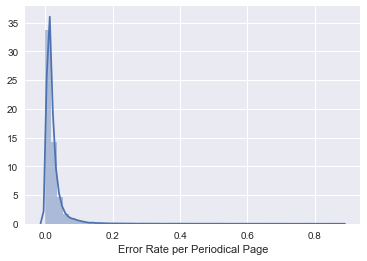

In [45]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [46]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 55018),
 ('e', 52036),
 ('m', 48405),
 ("'", 45820),
 ('d', 37504),
 ('t', 33748),
 ('r', 30225),
 ('n', 27751),
 ('g', 27415),
 ('f', 25466),
 ('pm', 17890),
 ('co', 6668),
 ('th', 5847),
 ('k', 5366),
 ('u', 4907),
 ('x', 4205),
 ('ex', 4124),
 ('oo', 3650),
 ('pa', 3045),
 ('wm', 2726),
 ('mo', 2649),
 ('z', 2505),
 ('io', 2447),
 ('id', 2307),
 ('pp', 2257),
 ('seventhday', 1973),
 ('re', 1927),
 ("the'", 1923),
 ('mt', 1750),
 ('tion', 1741),
 ('ahd', 1680),
 ('va', 1546),
 ('-', 1500),
 ('al', 1366),
 ('ft', 1205),
 ('ga', 1181),
 ('nd', 1153),
 ("canvassers'", 1131),
 ('ky', 1130),
 ('q', 1079),
 ('ti', 1056),
 ('mal', 995),
 ('ro', 981),
 ('li', 975),
 ('sabbathschool', 926),
 ('il', 924),
 ("''", 913),
 ('vt', 878),
 ('eze', 863),
 ('mc', 852)]

## Correction 9 -- Separate Squashed Words

In [48]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

RH18900107-V67-01-page14.txt: [('commandmentsantedated', 'commandments antedated')]
RH18900107-V67-01-page2.txt: [('oftheresurrectionofthebody', 'of the resurrection of the body')]
RH18900114-V67-02-page16.txt: [('disputantpreachers', 'disputant preachers')]
RH18900114-V67-02-page8.txt: [('selfaggrandizement', 'self aggrandizement')]
RH18900121-V67-03-page1.txt: [('forbyvirtueoftheirfofcithey', 'for by virtue of their f o f c i t h e y')]
RH18900204-V67-05-page1.txt: [('believingsinnerprospectsforeternitywhich', 'believing sinner prospects for eternity which')]
RH18900204-V67-05-page6.txt: [('PROTESTANToMISSIONS', 'PROTESTANT o MISSIONS')]
RH18900218-V67-07-page1.txt: [('WhenChristcametoourworld', 'When Christ came to our world'), ('spotlesslifeflashedlightupontheheartsofmen', 'spotless life flashed light upon the hearts of men')]
RH18900218-V67-07-page2.txt: [('wouldholdhimresponsibleforthisopportunity', 'would hold him responsible for this opportunity'), ('hewouldgiveusrevealingsofli

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1890-1920/correction9

Average verified rate: 0.9795403961953559

Average of error rates: 0.024002452518108713

Total token count: 52490166



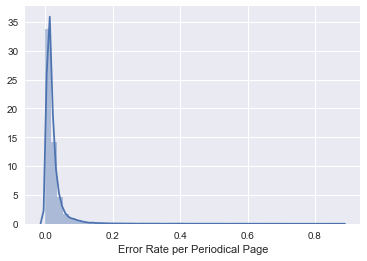

In [51]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [52]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 55086),
 ('e', 52265),
 ('m', 48749),
 ("'", 45820),
 ('d', 37544),
 ('t', 33957),
 ('r', 30396),
 ('n', 28027),
 ('g', 27471),
 ('f', 25539),
 ('pm', 17890),
 ('co', 6668),
 ('th', 5847),
 ('k', 5390),
 ('u', 4995),
 ('x', 4213),
 ('ex', 4124),
 ('oo', 3650),
 ('pa', 3045),
 ('wm', 2726),
 ('mo', 2649),
 ('z', 2529),
 ('io', 2447),
 ('id', 2307),
 ('pp', 2257),
 ('seventhday', 1973),
 ('re', 1927),
 ("the'", 1923),
 ('mt', 1750),
 ('tion', 1741),
 ('ahd', 1680),
 ('va', 1546),
 ('-', 1500),
 ('al', 1366),
 ('ft', 1205),
 ('ga', 1181),
 ('nd', 1153),
 ("canvassers'", 1131),
 ('ky', 1130),
 ('q', 1079),
 ('ti', 1056),
 ('mal', 995),
 ('ro', 981),
 ('li', 975),
 ('sabbathschool', 926),
 ('il', 924),
 ("''", 913),
 ('vt', 878),
 ('eze', 863),
 ('mc', 852)]